# Find topics & query matching

## Imports

In [ ]:
from google.colab import files
import io
from spacy.tokens import Doc, Span
from spacy.matcher import Matcher
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import gensim.corpora as corpora
import gensim
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import pyLDAvis.gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Document collection

In [ ]:
# 10 different articles
uploaded = files.upload()

nlp = spacy.load("en_core_web_sm")

# Read the uploaded files
with open('article1.txt', 'r', encoding='utf-8') as file:
    textq = file.read()

with open('article2.txt', 'r', encoding='utf-8') as file:
    text2 = file.read()

with open('article3.txt', 'r', encoding='utf-8') as file:
    text3 = file.read()

with open('article4.txt', 'r', encoding='utf-8') as file:
    text4 = file.read()

with open('article5.txt', 'r', encoding='utf-8') as file:
    text5 = file.read()

with open('article6.txt', 'r', encoding='utf-8') as file:
    text6 = file.read()

with open('article7.txt', 'r', encoding='utf-8') as file:
    text8 = file.read()

with open('article8.txt', 'r', encoding='utf-8') as file:
    text9 = file.read()

with open('article9.txt', 'r', encoding='utf-8') as file:
    text10 = file.read()

with open('article10.txt', 'r', encoding='utf-8') as file:
    text = file.read()

Saving article1.txt to article1 (2).txt
Saving article2.txt to article2 (2).txt
Saving article3.txt to article3 (2).txt
Saving article4.txt to article4 (2).txt
Saving article5.txt to article5 (2).txt
Saving article6.txt to article6 (2).txt
Saving article7.txt to article7 (2).txt
Saving article8.txt to article8 (2).txt
Saving article9.txt to article9 (2).txt
Saving article10.txt to article10 (2).txt


### Process the text with spaCy

In [ ]:
doc1 = nlp(textq)
doc2 = nlp(text2)
doc3 = nlp(text3)
doc4 = nlp(text4)
doc5 = nlp(text5)
doc6 = nlp(text6)
doc7 = nlp(text8)
doc8 = nlp(text9)
doc9= nlp(text10)
doc10 = nlp(text)

## Pre-processing with SpaCy

#### Removing stopwords
Filtering out common words that don't add much meaning.

In [ ]:
# spacy list of the most common words
stopwords = nlp.Defaults.stop_words

def preprocess(docs):
    preprocessed_docs = []
    for doc in docs:
        # tokenization
        tokens = doc.lower().split()
        # remove common words
        filtered_tokens = [token for token in tokens if token not in stopwords]
        preprocessed_docs.append(filtered_tokens)
    return preprocessed_docs

documents = [textq, text2, text3, text4, text5, text6, text8, text9, text10, text]

preprocessed_documents = preprocess(documents)
preprocessed_documents

[['u.s.',
  'regulators',
  'propose',
  'new',
  'online',
  'privacy',
  'safeguards',
  'children',
  'f.t.c.',
  'called',
  'sweeping',
  'changes',
  'curb',
  'social',
  'media,',
  'game',
  'learning',
  'apps',
  'use',
  'monetize',
  'youngsters’',
  'data.',
  'share',
  'article',
  '39',
  'boy’s',
  'hands',
  'holding',
  'iphone',
  'looks',
  'screen.',
  'federal',
  'regulators',
  'wednesday',
  'proposed',
  'sweeping',
  'changes',
  'federal',
  'children’s',
  'online',
  'privacy',
  'protection',
  'rule.credit...matt',
  'cardy/getty',
  'images',
  'natasha',
  'singer',
  'natasha',
  'singer',
  'covered',
  'children’s',
  'online',
  'privacy',
  '2012.',
  'dec.',
  '20,',
  '2023',
  'federal',
  'trade',
  'commission',
  'wednesday',
  'proposed',
  'sweeping',
  'changes',
  'bolster',
  'key',
  'federal',
  'rule',
  'protected',
  'children’s',
  'privacy',
  'online,',
  'significant',
  'attempts',
  'u.s.',
  'government',
  'strengthen',
 

## Topic Modeling

### Latent Semantic Analysis (LSA)

LSA (Latent Semantic Analysis) also known as LSI (Latent Semantic Index) LSA uses bag of word(BoW) model, which results in a term-document matrix(occurrence of terms in a document). Rows represent terms and columns represent documents. LSA learns latent topics by performing a matrix decomposition on the document-term matrix using Singular value decomposition. LSA is typically used as a dimension reduction or noise reducing technique.

#### Document Term Matrix
A document-term matrix is a mathematical matrix that indicates the frequency of terms that appear in a set of documents. In a document-term matrix, columns represent terms in the collection and rows represent documents in the collection.

In [ ]:
vectorizer = TfidfVectorizer()
bag_of_words = vectorizer.fit_transform(documents)
bag_of_words.todense()

matrix([[0.01222167, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.01040759, 0.0083098 , 0.03122278, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.02628792],
        ...,
        [0.        , 0.02617705, 0.        , ..., 0.02938827, 0.        ,
         0.        ],
        [0.        , 0.02303937, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00742059, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

## Singular value decomposition (SVD)
Singular value decomposition (SVD), a mathematical method, is used to condense a large piece of text into a matrix with word counts per document (rows represent unique words and columns represent each document). This technique reduces the number of rows while maintaining a similar structure among columns.

The cosine of the angle produced by any two vectors formed by columns is then used to compare documents, as is the dot product formed by the normalization of the two vectors. Values near 1 reflect documents that are extremely similar, while values near 0 describe documents that are quite different.

Similar to a principal component analysis, the singular value decomposition If you’re familiar with this statistical method, encoding the original data set with these latent features using latent semantic analysis will minimize its dimensionality. These latent features correspond to the original text data’s subjects.

In [ ]:
svd = TruncatedSVD(n_components=5)
lsa = svd.fit_transform(bag_of_words)
lsa

array([[ 0.67737162, -0.32012639, -0.14822658, -0.20764931, -0.03027637],
       [ 0.66612022,  0.18410601, -0.25557223,  0.32198478, -0.28994227],
       [ 0.69526533,  0.04700378,  0.06324479, -0.26159699, -0.33007211],
       [ 0.67921023, -0.19910435,  0.18085572, -0.37993829,  0.25873024],
       [ 0.62392387, -0.45682239,  0.4115918 ,  0.46830935, -0.03798804],
       [ 0.72546926, -0.15217737, -0.21084553, -0.09449117, -0.01074184],
       [ 0.71919971,  0.12782049, -0.07472873, -0.04094371, -0.2355472 ],
       [ 0.66391192,  0.02549481, -0.39747143,  0.21205967,  0.49492811],
       [ 0.65770744,  0.49221876,  0.39189994,  0.00707908,  0.22682785],
       [ 0.78869206,  0.2023516 ,  0.07591144,  0.03356866, -0.01201332]])

## Topic Encoded Data
This aims to transform our original data into topic-encoded data. The data now should consist of two columns one representing each of the two topics that we requested from the truncated SVD recalling that this value of two was passed as an argument to the truncated SVD.

In [ ]:
topic_encoded_df = pd.DataFrame(lsa, columns = ['topic_1', 'topic_2', 'topic_3',
                                                'topic_4', 'topic_5'])
topic_encoded_df['text'] = documents
display(topic_encoded_df[['text', 'topic_1', 'topic_2', 'topic_3',
                                                'topic_4', 'topic_5']])

,text,topic_1,topic_2,topic_3,topic_4,topic_5
0,U.S. Regulators Propose New Online Privacy Saf...,0.677372,-0.320126,-0.148227,-0.207649,-0.030276
1,The Hot New Market in Crypto? Trading FTX’s Ca...,0.666120,0.184106,-0.255572,0.321985,-0.289942
2,How Meta’s New Face Camera Heralds a New Age o...,0.695265,0.047004,0.063245,-0.261597,-0.330072
3,Apple Is Doing Its Part to End Green Bubble Sh...,0.679210,-0.199104,0.180856,-0.379938,0.258730
4,Threads Will Finally Let Users Delete Their Ac...,0.623924,-0.456822,0.411592,0.468309,-0.037988
5,Apple Explores A.I. Deals With News Publishers...,0.725469,-0.152177,-0.210846,-0.094491,-0.010742
6,"NASA Streams Cat Video From Deep, Deep Space\n...",0.719200,0.127820,-0.074729,-0.040944,-0.235547
7,"In Search of Cash, Studios Send Old Shows Back...",0.663912,0.025495,-0.397471,0.212060,0.494928
8,"Who is Yoshinobu Yamamoto, and why is he getti...",0.657707,0.492219,0.391900,0.007079,0.226828
9,It’s OK to Call It Soccer\nThe football-vs.-so...,0.788692,0.202352,0.075911,0.033569,-0.012013


**The dictionary** – that the dictionary is the set of all words that show up in at least one document in the body.

**Encoding matrix** – the encoding matrix was used to encode the documents into this topic-encoded representation it can be examined to get a greater understanding of what each topic represents.

In [ ]:
dictionary = vectorizer.get_feature_names_out()
dictionary

array(['000', '10', '100', ..., 'zimmer', 'zoom', 'zuckerberg'],
      dtype=object)

In [ ]:
encoding_matrix = pd.DataFrame(svd.components_, index = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5'], columns=dictionary).T
encoding_matrix

,topic_1,topic_2,topic_3,topic_4,topic_5
000,0.004411,-0.000697,-0.005914,0.001671,-0.005658
10,0.011544,0.018230,-0.003670,0.005592,0.025441
100,0.010847,0.003079,-0.006159,-0.002188,-0.009046
11,0.006609,0.007898,-0.004963,-0.002827,-0.016823
117,0.003904,0.007254,-0.010825,0.014177,-0.013206
...,...,...,...,...,...
zack,0.002672,0.013443,0.011506,0.000216,0.007161
zaslav,0.002043,0.000527,-0.008839,0.004902,0.011836
zimmer,0.004086,0.001055,-0.017678,0.009804,0.023671
zoom,0.002712,-0.005345,0.005219,-0.011397,0.008029


## Latent Dirichlet Allocation (LDA)



#### Create a dictionary

In [ ]:
id2word = corpora.Dictionary(preprocessed_documents)

#### Create corpus

In [ ]:
texts = preprocessed_documents

# term document frequency
corpus = [id2word.doc2bow(text) for text in texts]
corpus

[(0, 1),
 (1, 1),
 (2, 2),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 4),
 (14, 2),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 3),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1)]

#### LDA model training

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=5)
doc_lda = lda_model[corpus]
lda_model.print_topics()

[(0,
  '0.006*"new" + 0.004*"—" + 0.004*"said" + 0.004*"online" + 0.004*"glasses" + 0.003*"people" + 0.003*"like" + 0.003*"privacy" + 0.003*"meta" + 0.003*"services"'),
 (1,
  '0.005*"—" + 0.004*"like" + 0.003*"video" + 0.003*"glasses" + 0.003*"new" + 0.002*"said" + 0.002*"online" + 0.002*"people" + 0.002*"mr." + 0.002*"laser"'),
 (2,
  '0.005*"like" + 0.005*"—" + 0.003*"users" + 0.003*"apple" + 0.003*"said" + 0.003*"people" + 0.003*"new" + 0.003*"news" + 0.002*"mr." + 0.002*"online"'),
 (3,
  '0.004*"like" + 0.004*"—" + 0.004*"new" + 0.004*"netflix" + 0.003*"glasses" + 0.003*"said" + 0.003*"mr." + 0.002*"streaming" + 0.002*"meta" + 0.002*"content"'),
 (4,
  '0.006*"—" + 0.005*"like" + 0.004*"mr." + 0.004*"ftx" + 0.003*"new" + 0.003*"said" + 0.003*"people" + 0.003*"claims" + 0.002*"online" + 0.002*"said."')]

## Analyzing the model results

#### Visualize the topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


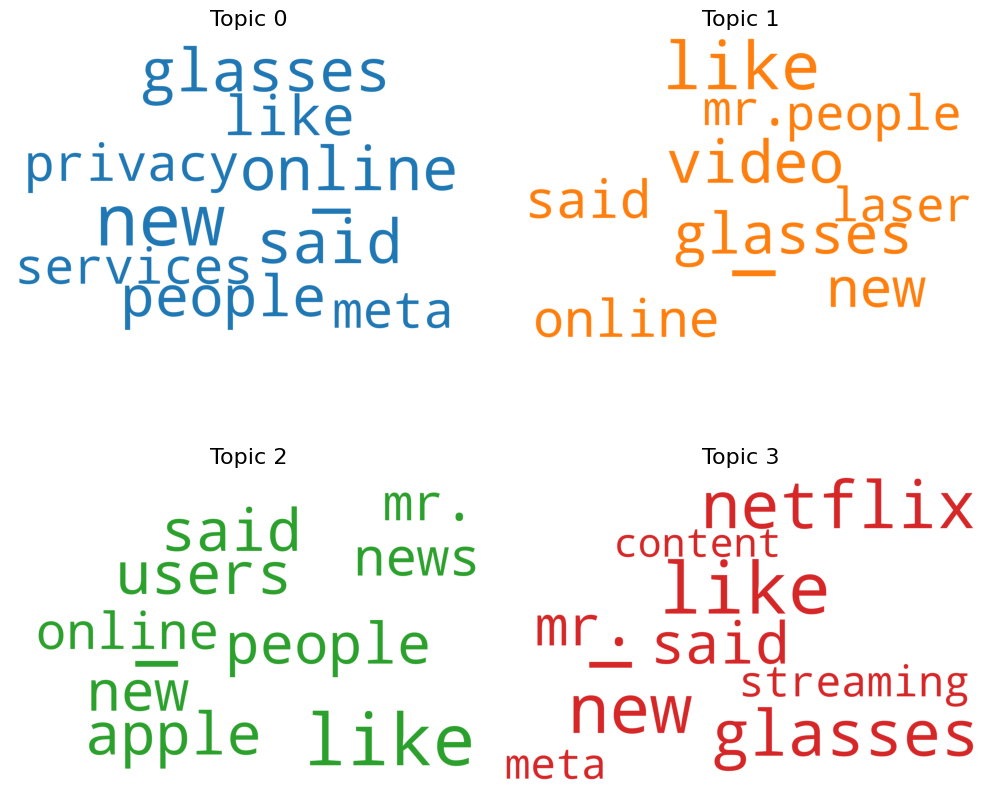

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2000,
                  height=1300,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Make a query

Compare the query with the collection of documents and find the document that most closely matches the query.

In [ ]:
query = """Apple Inc. is an American multinational technology company headquartered in Cupertino, California. As of March 2023, Apple is the world's largest company by market capitalization,[6] and with US$394.3 billion the largest technology company by 2022 revenue.[7] As of June 2022, Apple is the fourth-largest personal computer vendor by unit sales; the largest manufacturing company by revenue; and the second-largest mobile phone manufacturer in the world. It is considered one of the Big Five American information technology companies, alongside Alphabet (parent company of Google), Amazon, Meta (parent company of Facebook), and Microsoft.

Apple was founded as Apple Computer Company on April 1, 1976, by Steve Wozniak, Steve Jobs and Ronald Wayne to develop and sell Wozniak's Apple I personal computer. It was incorporated by Jobs and Wozniak as Apple Computer, Inc. in 1977. The company's second computer, the Apple II, became a best seller and one of the first mass-produced microcomputers. Apple went public in 1980 to instant financial success. The company developed computers featuring innovative graphical user interfaces, including the 1984 original Macintosh, announced that year in a critically acclaimed advertisement called "1984". By 1985, the high cost of its products, and power struggles between executives, caused problems. Wozniak stepped back from Apple and pursued other ventures, while Jobs resigned and founded NeXT, taking some Apple employees with him."""

# Function to find the most similar document to a given query
def find_most_similar_document(query, documents):
    # Combining documents and query
    all_texts = documents + [query]

    # Create the Document-Term Matrix with TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(all_texts)

    # Calculate cosine similarity between the query and all documents
    cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

    # Find the most similar document
    most_similar_document_index = np.argmax(cosine_similarities)
    most_similar_document = documents[most_similar_document_index]

    return most_similar_document, cosine_similarities[0][most_similar_document_index]

# Find the most similar document to the query
most_similar_document, similarity_score = find_most_similar_document(query, documents)
most_similar_document, similarity_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('Apple Explores A.I. Deals With News Publishers\nThe company has discussed multiyear deals worth at least $50 million to train its generative A.I. systems on publishers’ news articles.\n\nShare full article\n\n\n26\nPeople mill about a stone train station concourse with an Apple insignia behind them.\nThe negotiations mark one of the earliest examples of how Apple is trying to catch up to rivals in the race to develop generative A.I.Credit...Karsten Moran for The New York Times\n\nBy Benjamin Mullin and Tripp Mickle\nBenjamin Mullin covers the companies behind news and entertainment from New York. Tripp Mickle covers Apple from San Francisco.\n\nDec. 22, 2023\nApple has opened negotiations in recent weeks with major news and publishing organizations, seeking permission to use their material in the company’s development of generative artificial intelligence systems, according to four people familiar with the discussions.\n\nThe technology giant has floated multiyear deals worth at leas